<h4>Import statements</h4>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay, f1_score)
import tensorflow as tf

<h4>Setup Global Parameters</h4>

In [ ]:
RANDOM_STATE =24
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

EPOCHS =100
TEST_SIZE =0.2
ALPHA =0.001

In [ ]:
data_df = pd.read_csv('wine.csv')
data_df.head()

In [ ]:
data_df.shape

In [ ]:
data_df.info()

In [ ]:
data_df.describe().T

In [ ]:
sns.heatmap(data_df.corr().abs(), cmap="Blues")

In [ ]:
fig , ax = plt.subplots(figsize= (15 ,5))
sns.heatmap(data_df.corr().abs(), cmap="Blues" ,annot= True, fmt=".2g", cbar= False)

In [ ]:
for col in data_df.columns:
    print(f'{col}: dadata_df{col}.uniques')

<h4>Prepare data for training </h4>

In [33]:
labels = data_df[data_df.columns[-1]]
features_df = data_df.drop(data_df.columns[-1], axis =1)
assert features_df.shape[0]==labels.shape[0] , 'Number of examples not same'

In [35]:
# split the data in train test set

X_train, X_test, y_train, y_test = train_test_split(features_df,labels,
                                                    random_state = RANDOM_STATE,
                                                    stratify=labels,
                                                    test_size=TEST_SIZE)

assert X_train.shape[0]==y_train.shape[0] , 'Number of examples not same'
assert X_test.shape[0]==y_test.shape[0] , 'Number of examples not same'

In [37]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)



In [39]:
le = LabelEncoder() # convert 1,2,3 -> 0,1,2
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [41]:
np.unique(y_train)

array([0, 1, 2], dtype=int64)

<h4>Prepare Model</h4>

In [44]:
np.unique(y_train)


array([0, 1, 2], dtype=int64)

In [46]:
# nodes : 13,8,3

model = tf.keras.Sequential([
    tf.keras.Input(shape= (X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation = 'relu'),

    tf.keras.layers.Dense(3)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Step1: Loss Function
loss_fn =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#Step 2 : Optimizer

optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)
#Step 3: 
model.compile(loss = loss_fn, optimizer = optimizer, metrics=['accuracy'])

# Step 4 :

history = model.fit(X_train, y_train,
                    epochs= EPOCHS,
                    validation_data=(X_test,y_test))

# Defaulted BATCH_SIZE, verbose =0

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1760 - loss: 1.3985 - val_accuracy: 0.1389 - val_loss: 1.3143
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1875 - loss: 1.3563 - val_accuracy: 0.1667 - val_loss: 1.2749
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2061 - loss: 1.3172 - val_accuracy: 0.2778 - val_loss: 1.2374
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2611 - loss: 1.2799 - val_accuracy: 0.3333 - val_loss: 1.2023
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2719 - loss: 1.2444 - val_accuracy: 0.3889 - val_loss: 1.1689
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3322 - loss: 1.2105 - val_accuracy: 0.4167 - val_loss: 1.1370
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3376 - loss: 1.1779 - val_accuracy: 0.4167 - val_loss: 1.1073
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3532 - loss: 1.1470 - val_accuracy: 0.4444 - val_loss: 1.0794

In [60]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.184397,1.400064,0.138889,1.314310
1,0.205674,1.356570,0.166667,1.274924
2,0.219858,1.315721,0.277778,1.237359
3,0.262411,1.276843,0.333333,1.202251
4,0.276596,1.239790,0.388889,1.168896


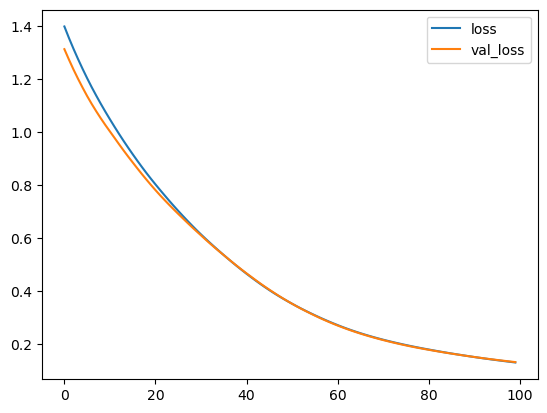

In [62]:
ax = loss_df.plot(y= ['loss', 'val_loss'])

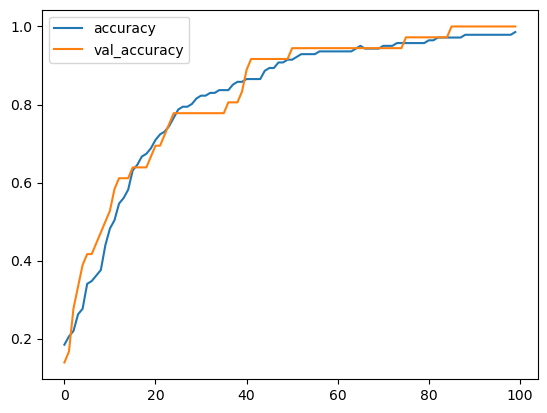

In [64]:
ax = loss_df.plot(y= ['accuracy', 'val_accuracy'])

In [68]:
y_train_pred = model.predict(X_train).argmax(axis = 1)
y_test_pred = model.predict(X_test).argmax(axis = 1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [76]:
print(f'Accuracy:{accuracy_score(y_train, y_train_pred):.4f}')

Accuracy:0.9858


In [78]:
print(f'Accuracy:{accuracy_score(y_test, y_test_pred):.4f}')

Accuracy:1.0000


In [80]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [88]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

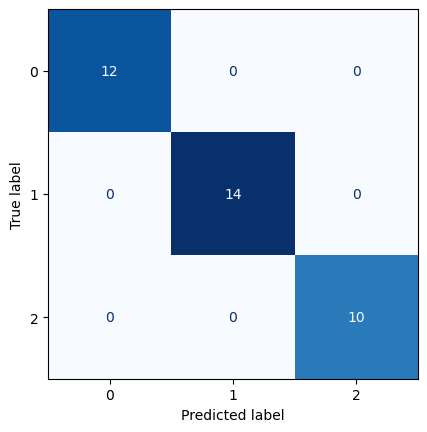

In [90]:
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", colorbar=False)

In [92]:
""" f1 = 2* (precsion8 recall) """
f1_score(y_test, y_test_pred, average="weighted")

1.0